## Lab 4: Exploring the Exponential Distribution and Poisson Process

### Due by April 29

In this homework, we study the relationship between the exponential distribution and the Poisson process via visualization. 



### Question 1: Data Preparation

1.1 Create a variable called `lambda_param` and assign it the value `1`. It represents $\lambda_{param}$ for a Poisson process.


1.2 Generate a $10\,000 \times 1\,000$ numpy matrix where each entry is drawn from the exponential distribution with rate `lambda_param`.


1.3 Convert this matrix into a pandas DataFrame called `df_exp` with **10,000 rows** and **1,000 columns**. Rename the column names to `Trial_1, Trial_2, ..., Trial_1000`.

- **Rows** represent independent observations (or successive events).
- **Columns** represent different trials (independent Poisson process, or independent experiments).


In [49]:
lambda_param = 1

import numpy as np
import pandas as pd

matrix = np.random.exponential(scale=1/lambda_param, size=(10000, 1000))

column_names = [f"Trial_{i+1}" for i in range(1,1001)]
df_exp = pd.DataFrame(matrix, columns=column_names)


### Question 2: Simulating Poisson process.

For each column in `df_exp`, compute the cumulative sum, i.e., row $i$ counts the total waiting time until the $i$th arrival happens for each Poisson process. 

Store the result in a new DataFrame `df_cumsum` (also $10\,000 \times 1\,000$). Adjust the row index of `df_cumsum` to start from `1` (instead of the default `0`).



Hint: Use function `cumsum()`.

In [50]:
df_cumsum = df_exp.cumsum(axis=0)
df_cumsum.index = df_cumsum.index + 1

### Question 3: Comparison with the Uniform Distribution

3.1. Extract all values from `df_cumsum` that are less than `10` and flatten them into a one-dimensional array named `cumsum_values_lt_10`.


3.2. Plot the density distribution of `cumsum_values_lt_10` using `sns.histplot`.


3.3. Generate a numpy array named `uniform_values` of `100,000` samples drawn from a uniform distribution over the interval `[0, 10]`. On the same plot, display its density distribution.


3.4. In a brief paragraph, describe any similarities or differences observed between these two distributions.


Hint: You can use `np.random.uniform` to generate uniform distribution.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
cumsum_values_lt_10 = df_cumsum[df_cumsum < 10].dropna()
cumsum_values_lt_10 = cumsum_values_lt_10.values.flatten()

In [53]:
uniform_values = np.random.uniform(0,10,size = 100000)

<Axes: ylabel='Density'>

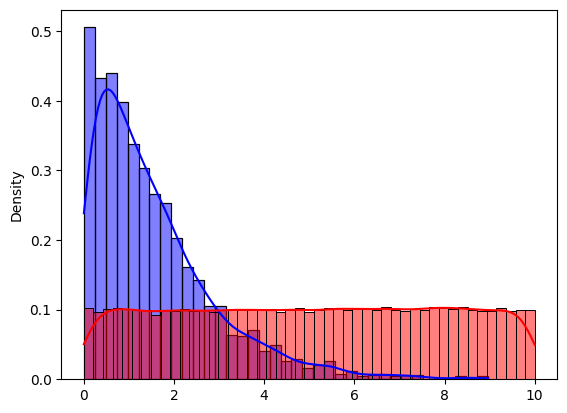

In [54]:
plt.subplots(1)
sns.histplot(cumsum_values_lt_10, kde=True, color='blue', stat="density")
sns.histplot(uniform_values, kde=True, color='red', stat="density")

The exponential distribution has different levels of density, eventually decreasing, while the uniform distribution holds about even density-wise from the range 0 to 10.

### Question 4: Maximum Index Analysis and Comparison with Poisson Distribution

4.1. For each column in `df_cumsum`, determine the maximum row index at which the cumulative sum remains less than or equal to `10`. Create a Series named `max_indices` that contains these indices (each index represents the number of observations or 'events' before exceeding 10).

Intuitively, `max_indices` counts the total number of arrivals before time `10`.


4.2. Generate `100,000` Poisson-distributed random samples with parameter $\lambda = 10 \times \lambda_{param}$  using `numpy.random.poisson`, storing the samples in `poisson_samples`.


4.3. Plot the density distribution of `max_indices` using `sns.histplot` and overlay the plot of `poisson_samples` on the same figure.


4.4. In a brief paragraph, compare the empirical distribution of `max_indices` with the theoretical Poisson distribution.


In [55]:
max_indices = df_cumsum.apply(lambda x: x[x <= 10].index.max(), axis=0)

In [56]:
poisson_samples = np.random.poisson(lam = 10*lambda_param, size=100000)

<Axes: ylabel='Density'>

<Figure size 1000x600 with 0 Axes>

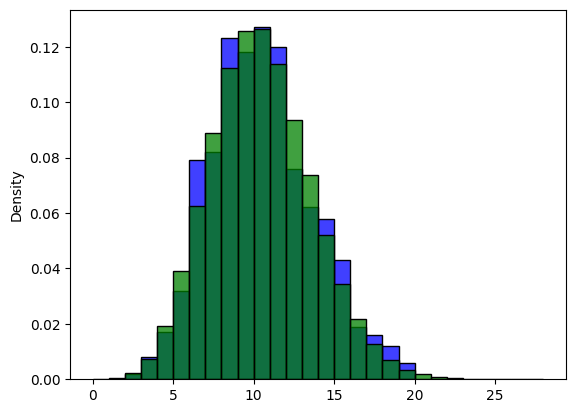

In [57]:
plt.figure(figsize=(10, 6))
plt.subplots(1)
sns.histplot(max_indices, binwidth = 1, color='blue', stat="density")
sns.histplot(poisson_samples, binwidth=1, color='green', stat="density")

The distributions are similar to each other, which makes sense because summing the exponential distributions with lambda = 1 until we hit 10 gives us a distribution of Poisson(lambda*10) = Poisson(10).

### Question 5: Repetition with $\lambda_{param}=5$

- Repeat Questions 1 to 4 using a new rate parameter `lambda_param = 5`.
- Generate updated code and new distribution plots for:
  - Cumulative sum values compared with the uniform distribution.
  - Maximum row index compared with the Poisson distribution.


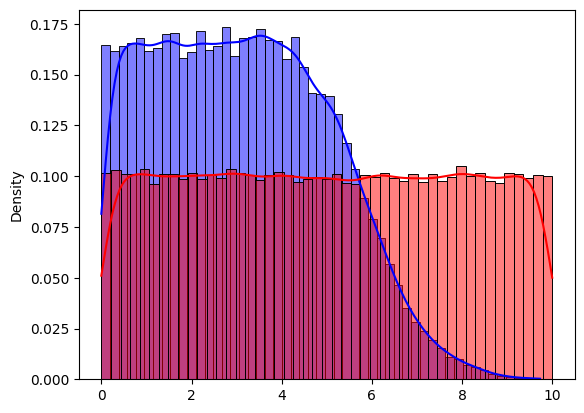

<Figure size 1000x600 with 0 Axes>

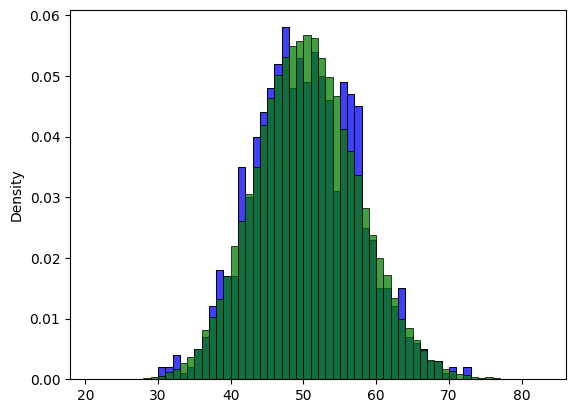

In [58]:
lambda_param = 5
# Do all the following steps again with the new lambda_param
matrix = np.random.exponential(scale=1/lambda_param, size=(10000, 1000))
df_exp = pd.DataFrame(matrix, columns=column_names)
df_cumsum = df_exp.cumsum(axis=0)
df_cumsum.index = df_cumsum.index + 1
cumsum_values_lt_10 = df_cumsum[df_cumsum < 10].dropna()
cumsum_values_lt_10 = cumsum_values_lt_10.values.flatten()
uniform_values = np.random.uniform(0,10,size = 100000)
plt.subplots(1)
sns.histplot(cumsum_values_lt_10, kde=True, color='blue', stat="density")
sns.histplot(uniform_values, kde=True, color='red', stat="density")
max_indices = df_cumsum.apply(lambda x: x[x <= 10].index.max(), axis=0)
poisson_samples = np.random.poisson(lam = 10*lambda_param, size=100000)
plt.figure(figsize=(10, 6))
plt.subplots(1)
sns.histplot(max_indices, binwidth = 1, color='blue', stat="density")
sns.histplot(poisson_samples, binwidth=1, color='green', stat="density")
plt.show()

### Question 6: Joint Distribution

In this question, we focus on the number of arrivals before \(T=5\) and \(T=10\) for each trial (i.e., each column in `df_cumsum`). 

6.1. For each trial, compute:
   - The number of arrivals before \(T=5\) (i.e., the maximum row index where the cumulative sum is $\leq5$) and store these in a Series called `N_T5`.
   - The number of arrivals before \(T=10\) (i.e., the maximum row index where the cumulative sum is $\leq10$) and store these in a Series called `N_T10`.

6.2. Visualize the joint relationship between `N_T5` and `N_T10` using:
   - A scatter plot to explore their joint behavior.
   - Adding marginal distributions on the sides of the scatter plot.

6.3 What are marginal distributions for `N_T5` and `N_T10`? Are they correlated?

<Axes: ylabel='Density'>

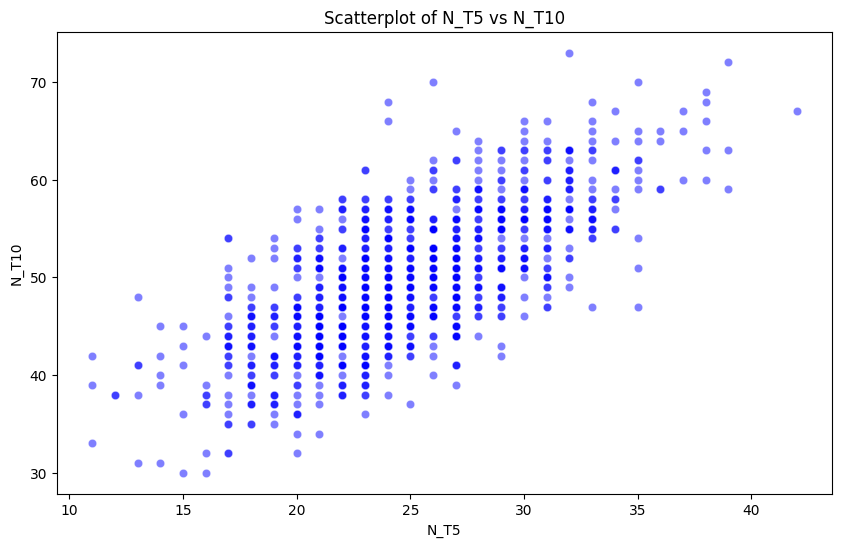

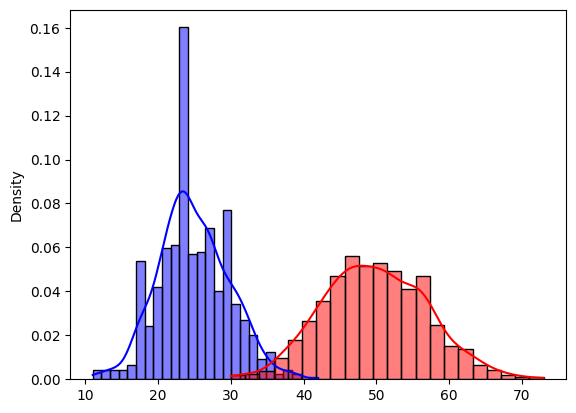

In [59]:
N_T5 = (df_cumsum <= 5).sum(axis = 0)
N_T10 = (df_cumsum <= 10).sum(axis = 0)

# Scatterplot to visualize the relationship between N_T5 and N_T10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=N_T5, y=N_T10, color='blue', alpha=0.5)
plt.xlabel('N_T5')
plt.ylabel('N_T10')
plt.title('Scatterplot of N_T5 vs N_T10')

# Add marginal distributions
plt.subplots(1)
sns.histplot(N_T5, kde=True, color='blue', stat="density")
sns.histplot(N_T10, kde=True, color='red', stat="density")

Yes, the marginal distributions are slightly positively correlated. We can see a small general positive trend in the scatterplot.